In [1]:
!pip install statsmodels

You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, r2_score



In [3]:
from fosforml.model_manager.snowflakesession import get_session
my_session = get_session()
 
table_name = '"FACT_CUSTOMER_ORDERS"'
 
sf_df = my_session.sql("select * from {}".format(table_name))
df = sf_df.to_pandas()

In [4]:
data = df[['PRODUCT_ID','ORDER_DATE','ORDER_QTY']]

In [5]:
data['ORDER_DATE']=pd.to_datetime(data['ORDER_DATE'])

In [6]:
data_grouped = data.groupby(['PRODUCT_ID',data['ORDER_DATE'].dt.to_period('M')]).agg(Total_Order_Qty=('ORDER_QTY','sum')).reset_index()

In [7]:
data_grouped['ORDER_MONTH']=data_grouped['ORDER_DATE'].dt.to_timestamp()

In [8]:
data_grouped = data_grouped[['ORDER_MONTH','Total_Order_Qty']]

In [9]:
data_grouped = data_grouped.set_index('ORDER_MONTH')

In [10]:
data_grouped

,Total_Order_Qty
ORDER_MONTH,
2019-01-01,148400
2019-02-01,146650
2019-03-01,133150
2019-04-01,153600
2019-05-01,154650
...,...
2024-04-01,30200
2024-05-01,27850
2024-06-01,33200


In [11]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

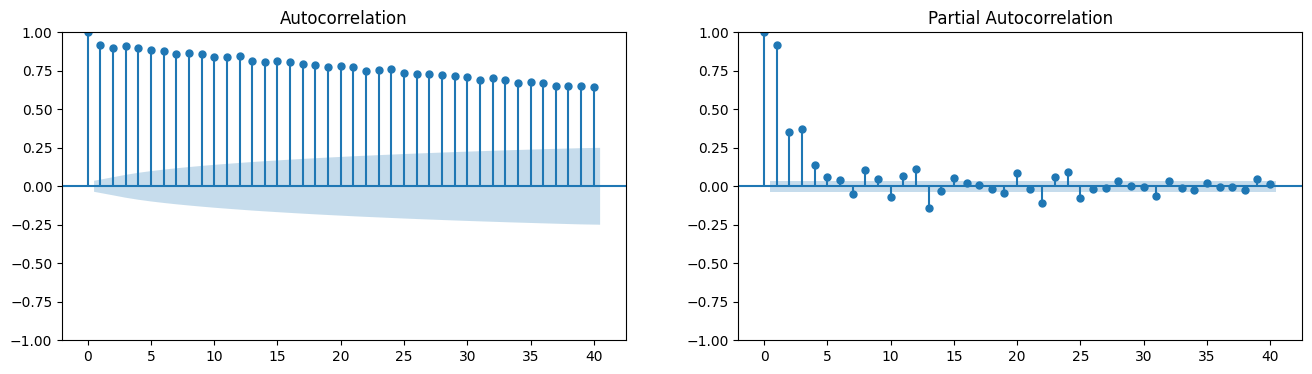

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
plot_acf(data_grouped['Total_Order_Qty'], lags=40, ax=axes[0])
plot_pacf(data_grouped['Total_Order_Qty'], lags=40, ax=axes[1])
plt.show()

<Axes: xlabel='ORDER_MONTH'>

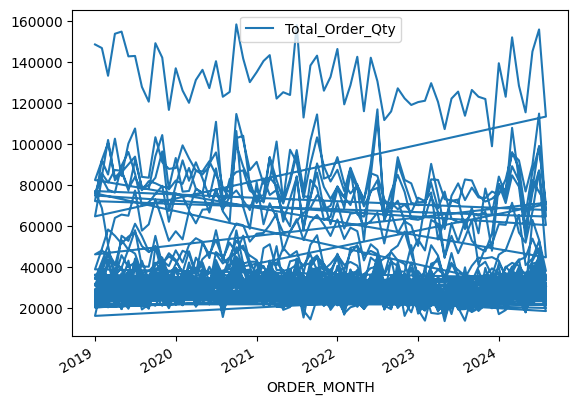

In [14]:
data_grouped.plot()

In [15]:
data_grouped.describe()

,Total_Order_Qty
count,2992.000000
mean,39586.564171
std,22472.377151
min,13750.000000
25%,27000.000000
50%,31550.000000
75%,39950.000000
max,158150.000000


<Axes: xlabel='ORDER_MONTH'>

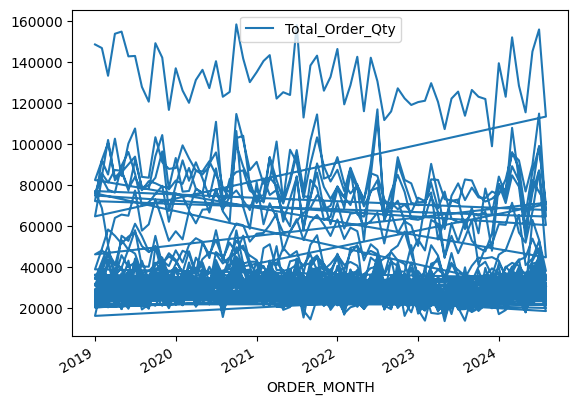

In [16]:
data_grouped.plot()